In [14]:
#Importing Libraries
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.models import Model
import matplotlib.pyplot as plt

#Preprocessing my image for the VGG16 model
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_data = image.img_to_array(img)  
    img_data = np.expand_dims(img_data, axis=0)  
    img_data = preprocess_input(img_data)  
    return img_data

#File path
img_path = 'car.jpeg'
img_data = preprocess_image(img_path)




In [15]:
#Loading the VGG16 model pretrained on ImageNet
model = VGG16(weights='imagenet')

#Prediction for the image
preds = model.predict(img_data)

#Decoding and displaying the top-5 predictions
print('Predicted:', decode_predictions(preds, top=5)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted: [('n04285008', 'sports_car', 0.79980963), ('n04037443', 'racer', 0.18160285), ('n02974003', 'car_wheel', 0.0076069636), ('n03100240', 'convertible', 0.007166699), ('n03459775', 'grille', 0.0010451553)]


In [16]:
#Plotting feature maps with increased number of filters
def plot_feature_maps(layer_outputs, num_filters=12): 
    for layer_output in layer_outputs:
        if len(layer_output.shape) == 4:  #Checking if it's a 4D feature map
            #Determining how many filters are available
            filters_in_layer = layer_output.shape[-1]  #No. of filters in the current layer
            num_filters_to_plot = min(num_filters, filters_in_layer)  #Adjusting to available filters
            
            #Selecting and visualizing few filters
            fig, ax = plt.subplots(1, num_filters_to_plot, figsize=(20, 20))
            for i in range(num_filters_to_plot):
                ax[i].imshow(layer_output[0, :, :, i], cmap='viridis')
                ax[i].axis('off')
            plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


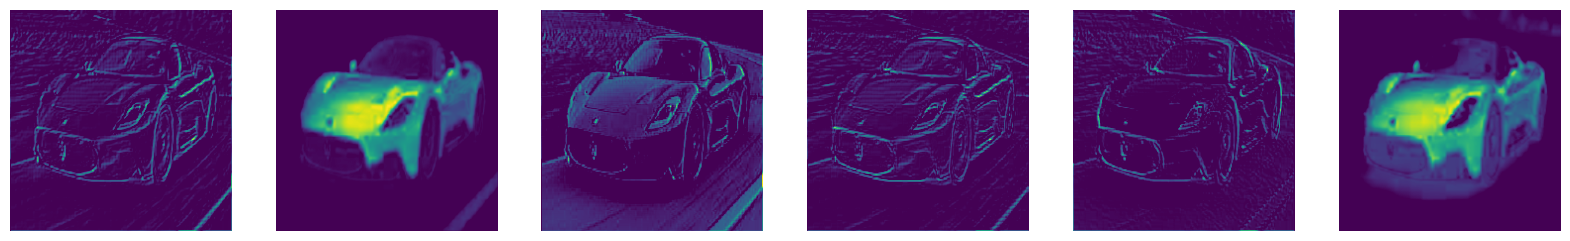

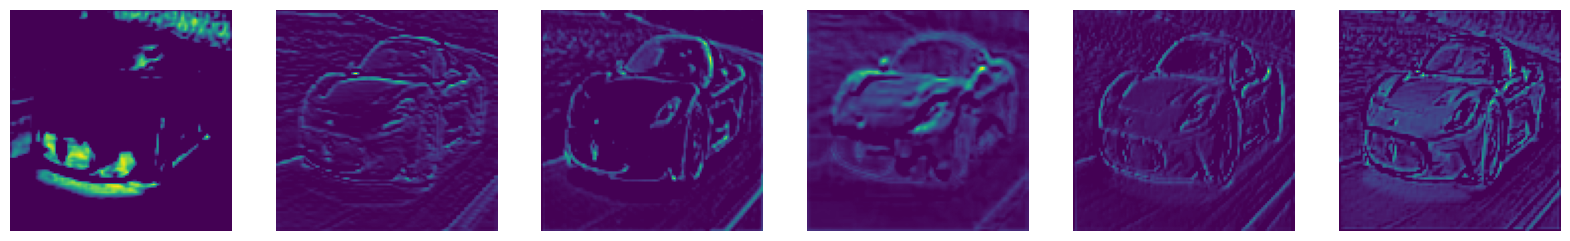

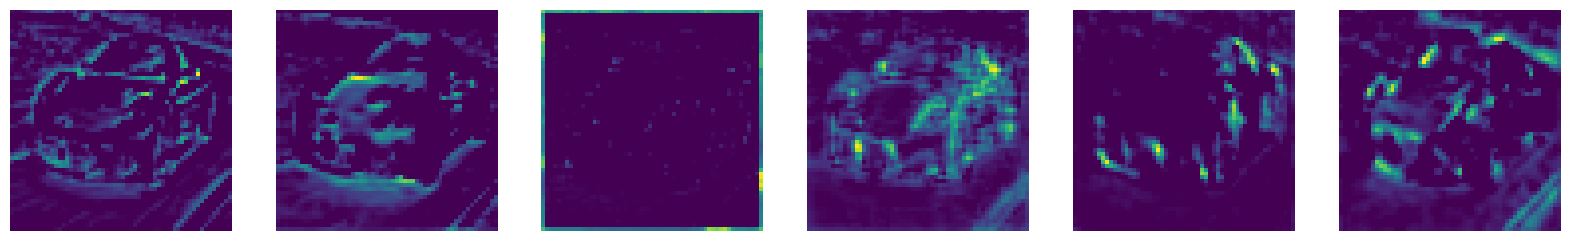

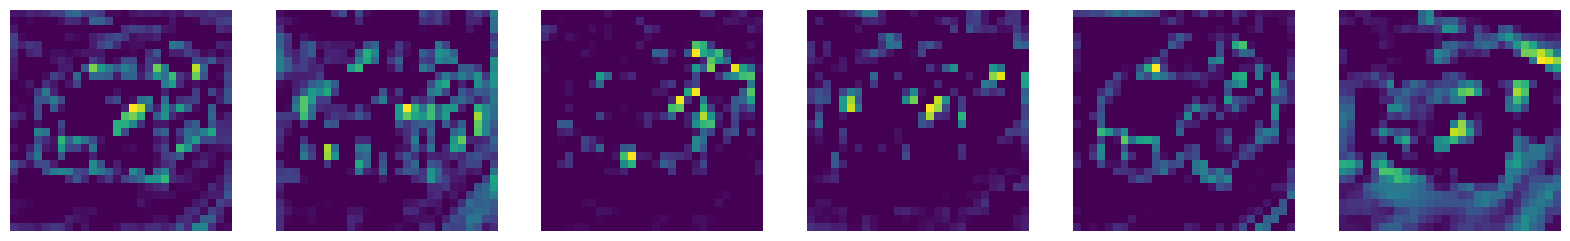

In [9]:
#Getting outputs from specific layers in the model, for example, convolutional and pooling layers
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block3_pool']
layer_outputs = [model.get_layer(layer_name).output for layer_name in layer_names]

#Creating new model that will return the outputs for these layers
intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

#Passing the image through the intermediate model
intermediate_output = intermediate_model.predict(img_data)

#Plotting the feature maps for these layers with more filters
plot_feature_maps(intermediate_output, num_filters=6)
